In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/PulockDas/pd-12-resources/refs/heads/master/titanic.csv"

df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [7]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Cabin'].fillna('Unknown', inplace=True)

<ipython-input-7-5ce9d82c7c5c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


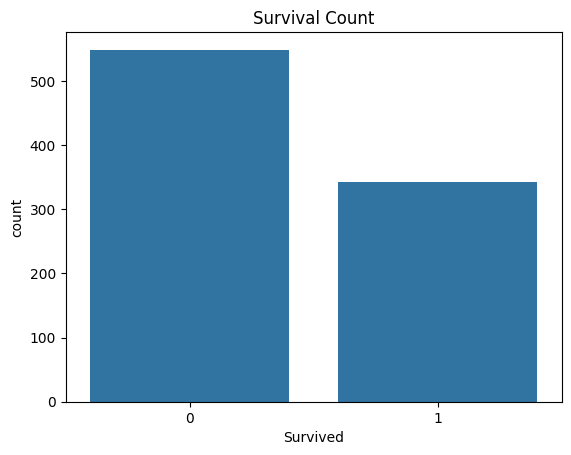

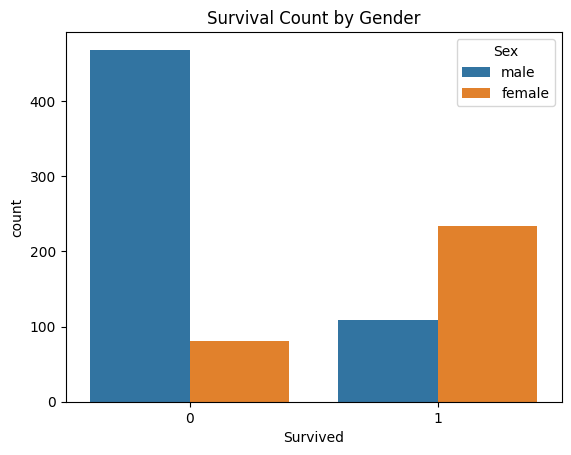

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.show()

sns.countplot(x="Survived", hue="Sex", data=df)
plt.title("Survival Count by Gender")
plt.show()


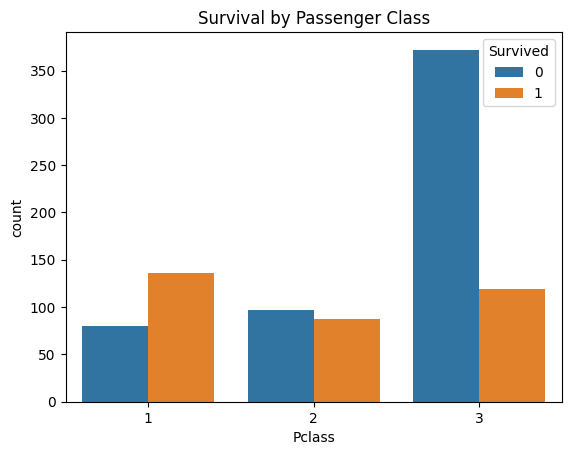

In [10]:
sns.countplot(x="Pclass", hue="Survived", data=df)
plt.title("Survival by Passenger Class")
plt.show()

In [12]:
df['AgeClass'] = pd.cut(df['Age'], bins=[0, 16, 26, 36, 62, 100], labels=[0, 1, 2, 3, 4])


In [13]:
df.drop(columns=['Age'], inplace=True)


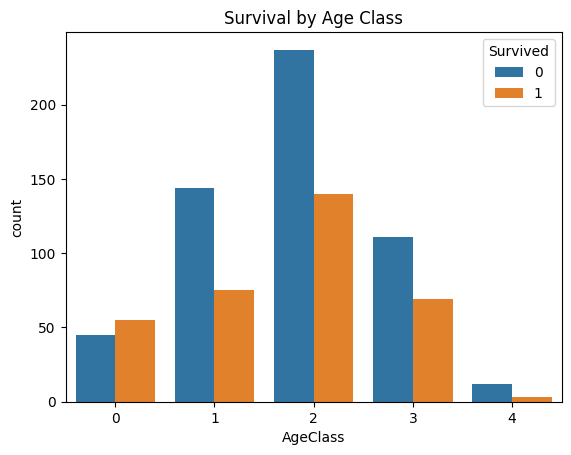

In [14]:
sns.countplot(x="AgeClass", hue="Survived", data=df)
plt.title("Survival by Age Class")
plt.show()


In [15]:
df['Number of Relatives'] = df['SibSp'] + df['Parch']


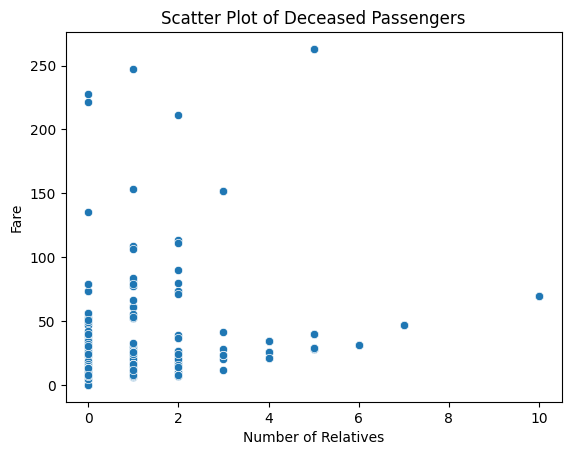

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(
    x=df[df['Survived'] == 0]['Number of Relatives'],
    y=df[df['Survived'] == 0]['Fare']
)
plt.xlabel("Number of Relatives")
plt.ylabel("Fare")
plt.title("Scatter Plot of Deceased Passengers")
plt.show()
